The first step will be implementing a code block to count the words contained in this dataset.

In [1]:
import json

with open('Salatiel_DPrepHDip_CA1.ipynb') as json_file:
    data = json.load(json_file)

In [2]:
wordCount = 0
for each in data['cells']:
    cellType = each['cell_type']
    if cellType == "markdown":
        content = each['source']
        for line in content:
            temp = [word for word in line.split() if "#" not in word] # it might need to filter for more markdown keywords here
            wordCount = wordCount + len(temp)
            
print(f'The number of words in Markdown in this dataset is {wordCount}.')

The number of words in Markdown in this dataset is 2191.


As a second step, it will be included in the dataset the coding cell for showing the button option to hide or display the code blocks and make it easier and cleaner to read.

In [3]:
from IPython.display import HTML

HTML('''<script>

code_show=true; 

function code_toggle() {

 if (code_show){

 $('div.input').hide();

 } else {

 $('div.input').show();

 }

 code_show = !code_show

} 

$( document ).ready(code_toggle);

</script>

<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# **APS(AIR PRESSURE SYSTEM) - SCANIA TRUCKS**

This dataset consists of data collected from heavy Scania trucks in everyday usage and their respective brakes system. The Air Pressure System (APS) is a significant part of a heavy-duty vehicle, where compressed air causes the piston to apply pressure on the brake pads, slowing down the vehicle.

## SUMMARY:

- IMPORTING LIBRARIES



- READING AND VIZUALIZING DATAFRAME



- ANALISING THE FEATURES



- CLEANING THE DATAFRAME



- FINDING OUTLIERS



- IMPLEMENTING SCALING AND PCA



- PLOTTING THE VARIANCE



- CONCLUSION OF THE RESULTS



- CURSE OF DIMENSIONALITY


- REFERENCE LIST

## IMPORTING LIBRARIES ##

A library is a collection of functions that can be added to the Python code and called as necessary, just like any other function. This will be the first step of this dataset.  

For this project, the following libraries will be imported:

- Pandas: This library has been one of the most commonly used tools for Data Science and Machine learning, which is used for data cleaning and analysis. In other words, the best tools to work with a messy database.

- Numpy: Numpy will be useful to perform a wide variety of mathematical operations on arrays.

- Seaborn: This one will be used for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures. Seaborn helps you explore and understand your data.

- Matplotlib: It will make it possible to create numerous and diverse plot(graphs) types. In other words, it is used more for graph creation and easy visualization of the data.

- Scikit-learn (Sklearn) MinMaxScaler will provide a selection of efficient tools for machine learning and statistical modeling. Sklearn's MinMaxScaler is a preprocessing technique that scales data. In other words. it transforms the features by leaving them at the same scale in a certain range

- Sklearn.decomposition PCA or Principal Component Analysis is a technique that will reduce the dimension of features of the dataset

- Warnings: To avoid the usual warning messages issued in situations where it is useful to alert the user of some condition in a program.

In [4]:
# Import pandas to read, vizualize and print info from the dataframe
import pandas as pd  


# Import numpy to be able to use math calcs
import numpy as np


# Import seaborn to vizualize graphics
import seaborn as sns


# Import maplotlib.pyplot to build and custom graphics
import matplotlib.pyplot as plt


# Import MinMaxScaler to transform features in the same scale 
from sklearn.preprocessing import MinMaxScaler



# Import PCA to reduce the dimensionallity of features 
from sklearn.decomposition import PCA


# Import warning to suppress the warnings
import warnings
warnings.filterwarnings('ignore')

## READING AND VIZUALISING DATAFRAME ##

Here, the variable to call the DataFrame will be defined. Now, using the library 'pandas', it is time to import the Excel data file type Comma Separated Values (CSV) from the same folder where the dataset of Jupyter Notebook is on the pc.

In [5]:
# Call the DataFrame by 'df' and import it using pandas

df=pd.read_csv('aps_failure_set.csv', na_values=['na'])

Calling for the command ".head(10)" it will be possible to see the 10 rows on the top of the dataset.

In [6]:
# Call for the code to vizualise the top of the dataset

df.head(10)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
5,neg,38312,NaN,2.130706e+09,218.0,0.0,0.0,0.0,0.0,0.0,...,388574.0,288278.0,900430.0,300412.0,1534.0,338.0,856.0,0.0,0.0,0.0
6,neg,14,0.0,6.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,168.0,48.0,60.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0
7,neg,102960,NaN,2.130706e+09,116.0,0.0,0.0,0.0,0.0,0.0,...,715518.0,384948.0,915978.0,1052166.0,1108672.0,341532.0,129504.0,7832.0,0.0,0.0
8,neg,78696,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,699290.0,362510.0,1190028.0,1012704.0,160090.0,63216.0,41202.0,4.0,0.0,0.0
9,pos,153204,0.0,1.820000e+02,NaN,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0


Calling for the command ".tail(10)", it will be possible to see the 10 rows at the bottom of the dataset.

In [7]:
# Call for the code to vizualise the bottom of the dataset

df.tail(10)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
59990,neg,81354,NaN,2.130706e+09,156.0,0.0,0.0,0.0,0.0,0.0,...,627610.0,376028.0,931828.0,1035236.0,674626.0,161266.0,3284.0,0.0,0.0,0.0
59991,neg,39308,NaN,4.520000e+02,374.0,0.0,0.0,0.0,0.0,0.0,...,312426.0,161694.0,323438.0,292350.0,250112.0,157636.0,234932.0,9506.0,0.0,0.0
59992,neg,14,0.0,2.000000e+00,2.0,0.0,0.0,0.0,0.0,0.0,...,132.0,44.0,80.0,52.0,54.0,0.0,0.0,0.0,0.0,0.0
59993,neg,0,2.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59994,neg,32,0.0,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,258.0,98.0,224.0,166.0,36.0,486.0,0.0,0.0,0.0,0.0
59995,neg,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0
59999,neg,40222,NaN,6.980000e+02,628.0,0.0,0.0,0.0,0.0,0.0,...,440066.0,183200.0,344546.0,254068.0,225148.0,158304.0,170384.0,158.0,0.0,0.0


Use 'df.shape' to see the count of how many columns and rows are in the dataset.

In [8]:
# Vizualise the number of rows and features of the dataset

df.shape

(60000, 171)

## ANALISING THE FEATURES ##

Now, it was used the method info() to print information about the DataFrame as this code will show the information contained as the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

In [9]:
# Vizualize the information contained in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 78.3+ MB


The term 'missing values' refers to missing data in a sample or dataset. This incompleteness can be derived from several failures in the storage of information, from data loss in the system to human filling failures. 'Isnull()' will be used in the DataFrame to indicate if any value is missing, in some cases, it may be useful to also count the number of missing values across the entire DataFrame.

In [10]:
# Using mv (missing values) to see how many missing values are in each column of my dataset


df.isnull().sum()

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

Defining a variable "df_percent" will display the percentage of all the missing values and have a better idea of how much this is affecting the dataset.

In [11]:
# Searching for null values in the dataset

df_percent = (df.isna().sum() / len(df['class']))*100

After defined the variable 'df_percent', it was called it to check how full of mmissing values the columns were.

In [12]:
df_percent

class      0.000000
aa_000     0.000000
ab_000    77.215000
ac_000     5.558333
ad_000    24.768333
            ...    
ee_007     1.118333
ee_008     1.118333
ee_009     1.118333
ef_000     4.540000
eg_000     4.538333
Length: 171, dtype: float64

In the next cell, it will be used the '.describe()' method, is used for calculating some statistical data like percentile, mean, and std of the numerical values of the Series or DataFrame. It analyses both numeric and object series and also the DataFrame column sets of mixed data types.

In [13]:
# Call for describe to display the description of values in the features

df.describe(include='all')

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,neg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,59000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,NaN,1.454301e+05,3.478962,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,NaN,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,NaN,8.340000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,NaN,3.077600e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,NaN,4.866800e+04,0.000000,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000


Using 'dtype' will inform about the layout of the array. This means that it shows information about the type of the data (integer, float, Python object, etc.) Size of the data (number of bytes).

In [14]:
# Call dtypes to display what type of data is contained in the dataset

df.dtypes

class      object
aa_000      int64
ab_000    float64
ac_000    float64
ad_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 171, dtype: object

After defining the data frame, it is used the 'df.count()' function to calculate the number of values that are present in the rows and ignores all the null or NaN values.

In [15]:
# Count the amount of values in the features ignoring the NaN values

df.count()

class     60000
aa_000    60000
ab_000    13671
ac_000    56665
ad_000    45139
          ...  
ee_007    59329
ee_008    59329
ee_009    59329
ef_000    57276
eg_000    57277
Length: 171, dtype: int64

## CLEANING THE DATAFRAME ##

Using the name of the dataframe or/plus the specific columns, then '.value_counts()', the dataset will count the number of records for every combination of unique values for the column(s) specificated.

In [16]:
# Counting the unique values of the column 'class'

df['class'].value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

In the next cell, it will be used the following code to be shown the NaN values in percent, to have a better compreension about their amount, quantity and how bad they're affecting my dataset.

In [17]:
# Vizualising the NaN values per columns in percentage

df.isna().sum() / (60000)

class     0.000000
aa_000    0.000000
ab_000    0.772150
ac_000    0.055583
ad_000    0.247683
            ...   
ee_007    0.011183
ee_008    0.011183
ee_009    0.011183
ef_000    0.045400
eg_000    0.045383
Length: 171, dtype: float64

In [18]:
df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


Replacing the names of the dependent variable will make it easier to deal with, as so far, the values are strings. Due to that, it will be applied the following function to transform the values negative and positive of the dataset into 0 and 1 respectively.

In [19]:
# Relabeling the independent variable 

def get_correct_label(y):
  
    return y.replace(['neg','pos'],[0,1])

print(df['class'].unique())
df['class'] = get_correct_label(df['class'])
print(df['class'].unique())

['neg' 'pos']
[0 1]


Intending to make the proportion of positive and negative in the column 'class', easier to work with, the code for it will be called a barplot, showing the distribution of the result variables 0 and 1.

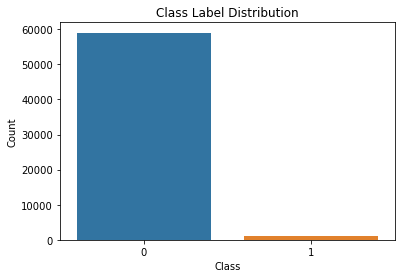

The number of positive class points is:  1000
The number of negative class points is:  59000


In [20]:
# Plotting the distribution of class label

sns.barplot(df['class'].unique(),df['class'].value_counts())
plt.title('Class Label Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

print('The number of positive class points is: ',df['class'].value_counts()[1])
print('The number of negative class points is: ',df['class'].value_counts()[0])

One of the tasks for data cleaning is identifying and dropping the standard deviation columns. In Mathematics and Statistics, Standard Deviation is the measure of dispersion, in other words, it is a measure that indicates how uniform a set of data is. When the standard deviation is low, the data in the group are closer to the mean. Due to this, the following function will identify the elements in the dataset with a standard deviation equal to zero '0' and remove the entire columns as this won't be helpful to the analyses of the data frame.

In [21]:
# Deleting columns with standard deviation = 0 as they aren`t relevant for our analysis

def constant_value(df):
   
    constant_value_feature = []
    info = df.describe()
    for i in df.columns:
        if info[i]['std']==0:
            constant_value_feature.append(i)
    df.drop(constant_value_feature,axis=1,inplace=True)
    return df,constant_value_feature

df , dropped_feature = constant_value(df)
print("The features that are dropped due to having a constant value (0 std. dev.) are: ",dropped_feature)
print("Shape of our feature set: ",df.shape)

The features that are dropped due to having a constant value (0 std. dev.) are:  ['cd_000']
Shape of our feature set:  (60000, 170)


In the cell below, the code is going to count all the missing values of the columns in the dataset, multiply them by 100 and divide the quantity of the columns dataframe. After doing that, a plot will be called to show the highest columns in terms of missing values, helping to visualise in percentages how many and which ones they are and how high the number of missing values per column is.

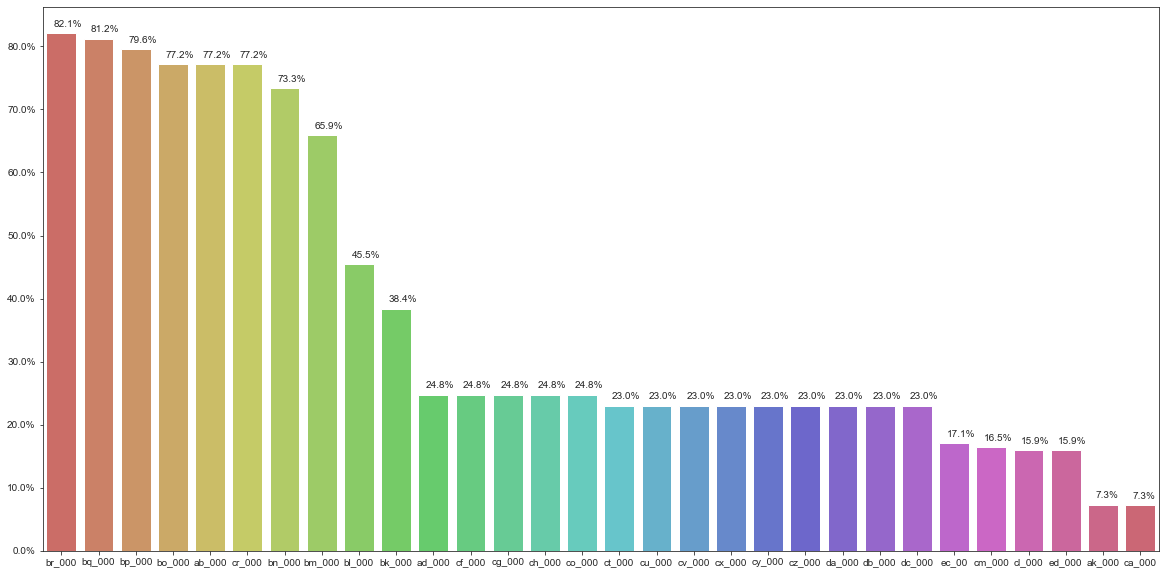

In [22]:
# Understanding missing values

# Creating a dictionary whose keys are the column names and values are the percentage of missing values
nan_count = {k:list(df.isna().sum()*100/df.shape[0])[i] for i,k in enumerate(df.columns)}

# Sorting the dictionary in descending order based on the percentage of missing values
nan_count = {k: v for k, v in sorted(nan_count.items(), key=lambda item: item[1],reverse=True)}

# Plotting a graph showing the top 30 features having highest percentage of missing values 
sns.set_style(style="ticks")
plt.figure(figsize=(20,10))

# Bar Plot
plot = sns.barplot(x= list(nan_count.keys())[:30],y = list(nan_count.values())[:30],palette="hls")

# Add annotations above each bar signifying their value
for p in plot.patches:
        plot.annotate('{:.1f}%'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+1))

# Make y-axis more interpretable
plot.set_yticklabels(map('{:.1f}%'.format, plot.yaxis.get_majorticklocs())) 
plt.show()

It is always a good practice to identify and replace missing values for each column in the input data prior to modelling the prediction task. This is called missing data imputation or imputing for short. After plotting the histogram and noticing which ones of the highest columns of missing values are, it is time to drop the ones over 60% as this is not going to make a significant difference in the dataset.

In [23]:
# drop the highest columns with mv (missing values)

df_drop = df.drop(columns=['br_000','bq_000','bp_000','bo_000','ab_000','cr_000','bn_000','bm_000'], axis=1)

In [24]:
df_drop

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,153002,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,2564.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,0,2286,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,0,112,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,0,80292,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


After dropping all the features over 60% regarding missing values, the dataset is now without the peaks of missing values per feature and able to be dealt with the remaining missing values.
The next cell, shows only 30 of all the remaining features containing missing values, after plotting it again just for better visualisation, the code for filling all these missing data will be called and they'll be all filled up with the respective median for each correspondent column.

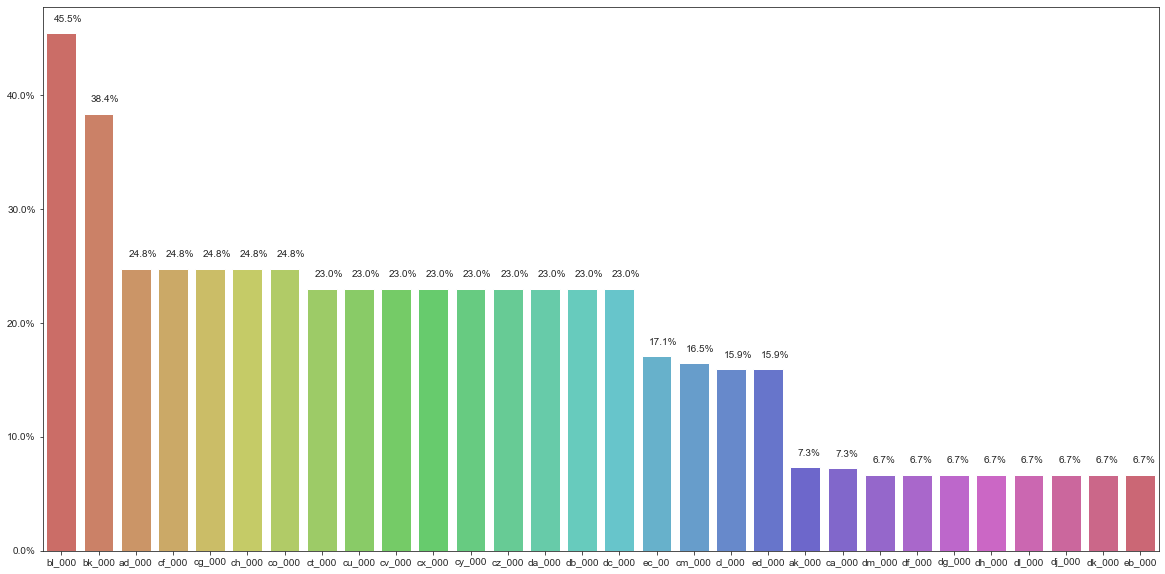

In [25]:
nan_count = {k:list(df_drop.isna().sum()*100/df.shape[0])[i] for i,k in enumerate(df_drop.columns)}
nan_count = {k: v for k, v in sorted(nan_count.items(), key=lambda item: item[1],reverse=True)}

 
sns.set_style(style="ticks")
plt.figure(figsize=(20,10))


plot = sns.barplot(x= list(nan_count.keys())[:30],y = list(nan_count.values())[:30],palette="hls")


for p in plot.patches:
        plot.annotate('{:.1f}%'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+1))


plot.set_yticklabels(map('{:.1f}%'.format, plot.yaxis.get_majorticklocs())) 
plt.show()

In [26]:
# fill up the 'na' values in the dataset 

df2 = df_drop.fillna(df_drop.median())
df2

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,153002,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,2564.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,0,2286,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,0,112,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,0,80292,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [27]:
df2.describe(include='all')

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,...,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,60000.000000
mean,0.016667,5.933650e+04,3.362258e+08,1.434383e+05,6.535000,10.548200,2.191577e+02,9.648104e+02,8.509771e+03,8.760054e+04,...,4.431223e+05,2.100188e+05,4.432268e+05,3.916653e+05,3.303672e+05,3.428586e+05,1.372212e+05,8.295099e+03,0.086467,0.203100
std,0.128020,1.454301e+05,7.767625e+08,3.504525e+07,158.147893,205.387115,2.036364e+04,3.400891e+04,1.494818e+05,7.575171e+05,...,1.149276e+06,5.403725e+05,1.162002e+06,1.114964e+06,1.063465e+06,1.718666e+06,4.472145e+05,4.721249e+04,4.268570,8.628043
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000,8.340000e+02,2.000000e+01,4.200000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.033500e+03,1.204000e+03,2.848500e+03,3.839000e+03,5.600000e+02,1.180000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,0.000000,3.077600e+04,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,0.000000,4.866800e+04,8.480000e+02,2.920000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.350315e+05,2.164440e+05,4.624655e+05,4.003010e+05,2.725220e+05,1.663465e+05,1.367255e+05,1.934000e+03,0.000000,0.000000
max,1.000000,2.746564e+06,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


## FINDING OUTLIERS

An outlier is a data item/object that deviates significantly from the rest of the objects (called normals). They can be caused by measurement or execution errors. Analysis for outliers is known as outliers mining and they can affect the results of the data for such a contrasting value in features where they don't fit within.
In the cell below describing data, it is possible to notice a few features with outliers just by taking a look at them. taking a few features to prove this affirmation, it is notorious that in the columns 'ae_000', 'af_000', 'ef_000' and 'eg_000' the 'max' values are highly discrepant from their respective 'mean' in the same feature.

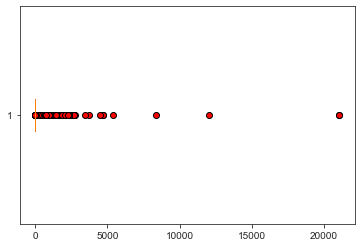

In [28]:
# Ploting the cited features above to display in boxplot how spread they are and vizualise the outliers 

red_circle = dict(markerfacecolor='red', marker='o')
plt.boxplot(x=df2['ae_000'], vert=False, flierprops=red_circle);

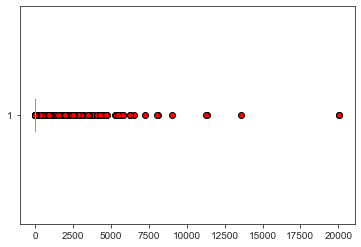

In [29]:
red_circle = dict(markerfacecolor='red', marker='o')
plt.boxplot(x=df2['af_000'], vert=False, flierprops=red_circle);

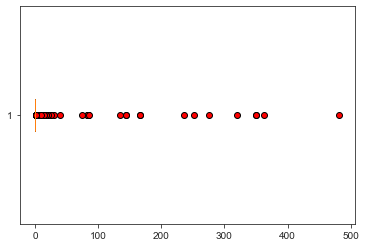

In [30]:
red_circle = dict(markerfacecolor='red', marker='o')
plt.boxplot(x=df2['ef_000'], vert=False, flierprops=red_circle);

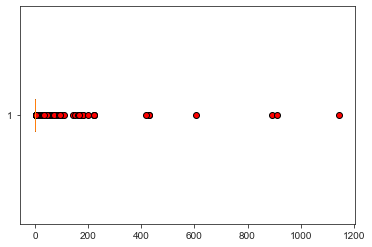

In [31]:
red_circle = dict(markerfacecolor='red', marker='o')
plt.boxplot(x=df2['eg_000'], vert=False, flierprops=red_circle);

As it is possible to see now how spread the values are, the next then will be implementing the MinMaxScale to scale them all in the same range.

## IMPLEMENTING SCALING AND PCA ##

The method MinMaxScaler scales all data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset. This scale compresses all inliers in the narrow range [0, 0.005]. And as it was identified many outliers contained in the dataset, the next step will be using the method MinMaxScaler from the library sklearn to compress all the contrasting values in the features and turn all of them into proportionally smaller values between -1 and 1. Also standardizing the axis x and y to train the rescaled data.

In [32]:
# Scaling data for PCA

features = df2.columns.drop(['class'])

# Separating out the features
x = df2.loc[:, features].values

# Separating out the target
y = df2.loc[:,['class']].values

# Standardizing the features
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(x)

In [33]:
data_rescaled

array([[2.79250729e-02, 9.99999832e-01, 3.26176944e-08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.20361295e-02, 0.00000000e+00, 1.46779625e-08, ...,
        3.93692728e-04, 0.00000000e+00, 0.00000000e+00],
       [1.49423061e-02, 1.07006746e-07, 1.16491766e-08, ...,
        1.34905375e-04, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.07782233e-05, 9.99999829e-01, 2.09685178e-09, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.92336170e-02, 9.99999829e-01, 5.75469322e-08, ...,
        1.01945944e-01, 0.00000000e+00, 0.00000000e+00],
       [1.46444794e-02, 3.27590826e-07, 7.31568288e-08, ...,
        4.14689673e-05, 0.00000000e+00, 0.00000000e+00]])

PCA, or Principal Component Analysis, is a technique to reduce the dimension of a dataset while preserving, in a way, its properties. In other simple words, it's transforming a dataset too large in feature numbers (dimensionality numbers) to a compact number of columns that would show the same information but synthesized without losing the information, however, changing the view of them.

In this case, the PCA is going to be used to reduce the number of features of the dataset aiming to reach a variance value of 99,5%

In [34]:
# 99.5% of variance

pca = PCA(n_components = 0.995)
pca.fit(data_rescaled)
reduced = pca.transform(data_rescaled)
reduced = pd.DataFrame(reduced)
reduced

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
0,0.356591,0.783233,0.156284,0.144462,-0.048762,0.003314,0.006013,-0.057675,-0.022370,0.023402,...,-0.006280,0.006894,-0.009547,0.000517,0.004176,-0.008859,-0.003129,0.001478,0.011376,-0.007865
1,0.157463,-0.164851,-0.137431,0.109524,0.682836,-0.003161,0.070434,0.042581,-0.019300,0.006266,...,-0.000244,-0.001503,0.002515,0.002341,0.000525,0.004416,-0.001262,0.000011,0.002713,-0.000298
2,-0.206339,-0.115532,-0.050873,-0.154569,-0.000083,-0.002348,-0.005223,-0.009881,0.002832,-0.012449,...,0.000888,-0.001171,0.002811,0.001726,-0.000919,0.000427,-0.000683,0.000391,-0.000378,0.000151
3,-0.469586,-0.089561,-0.057335,-0.063541,-0.003390,-0.005476,-0.003904,0.009473,-0.001537,0.004747,...,0.003403,-0.004113,0.001252,0.001047,0.016133,-0.002018,-0.000092,-0.001113,0.001847,-0.000809
4,0.272863,-0.191079,-0.051659,0.029645,-0.014637,0.027388,0.037346,-0.028097,-0.009905,0.013948,...,0.001134,0.001255,0.005362,0.001685,-0.001373,-0.006074,-0.001340,-0.001974,-0.002939,0.003501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.857822,-0.264551,-0.005343,-0.033103,-0.003771,0.003911,0.049114,-0.069152,-0.030682,-0.017655,...,-0.007703,0.010329,-0.001841,0.001297,0.000147,-0.005140,-0.000794,-0.005401,-0.004493,0.001528
59996,-0.201768,0.876199,0.035631,0.025709,-0.012950,-0.006878,-0.006514,0.019483,0.001836,0.000997,...,-0.000382,-0.000999,0.001086,-0.000369,-0.000723,0.000432,0.000285,0.000077,-0.000508,0.000454
59997,-0.321241,0.889222,0.056241,0.019777,-0.015302,-0.007424,-0.008845,0.018633,0.001092,0.005044,...,-0.000655,-0.000634,0.001215,0.000009,-0.000503,0.000610,-0.000028,0.000301,-0.000427,0.000182
59998,-0.255295,0.853007,0.259741,0.084689,-0.024601,-0.019991,-0.023653,-0.069877,-0.037667,0.017044,...,0.001480,-0.003072,-0.026241,-0.013820,-0.001034,-0.003326,-0.006802,-0.000087,0.005549,-0.001752


Given a set of data, the variance is a measure of dispersion that shows how far each value in that set is from the central (average) value; The smaller the variance, the closer the values are to the mean. Then it was called the cumulative variance, which is the amount of variance of the df2 explained by each type of model plotted against the number of components where each one represents the feature variances contained in the dataset.

In [35]:
# Call the cumulative variance to display the amount and feature values used to reach 99,5% of variance

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
cumulative_variance

array([0.35585597, 0.63404402, 0.76278908, 0.87136535, 0.9047821 ,
       0.91629773, 0.92739355, 0.93752306, 0.94524766, 0.95072722,
       0.95456044, 0.95812866, 0.96129603, 0.96380151, 0.96586019,
       0.9676469 , 0.96919573, 0.97068428, 0.97210269, 0.97342267,
       0.9745554 , 0.97563227, 0.97668226, 0.97765701, 0.97856337,
       0.97941524, 0.98018655, 0.98093851, 0.98162156, 0.98229322,
       0.98292782, 0.98354584, 0.98415471, 0.98469042, 0.98519907,
       0.98568468, 0.98616761, 0.98663499, 0.98708647, 0.98750937,
       0.98792217, 0.98831575, 0.98869397, 0.98907045, 0.98941842,
       0.98976264, 0.99009384, 0.99041371, 0.9907226 , 0.99101205,
       0.9913007 , 0.99157929, 0.99185186, 0.99211433, 0.99236728,
       0.99261274, 0.9928461 , 0.99306921, 0.99328711, 0.9934948 ,
       0.99369999, 0.99390288, 0.99409739, 0.99429083, 0.9944742 ,
       0.99465305, 0.99482453, 0.99498802, 0.99514751])

Doing the PCA was helpful not only to reduce the number of features in the dataset but also to establish the correct number of necessary features to use for reaching the 99,5% requested. So, in the end, it's possible to see that the model needed a very high number of features to reach this percentage of variance.

## PLOTTING THE VARIANCE ##

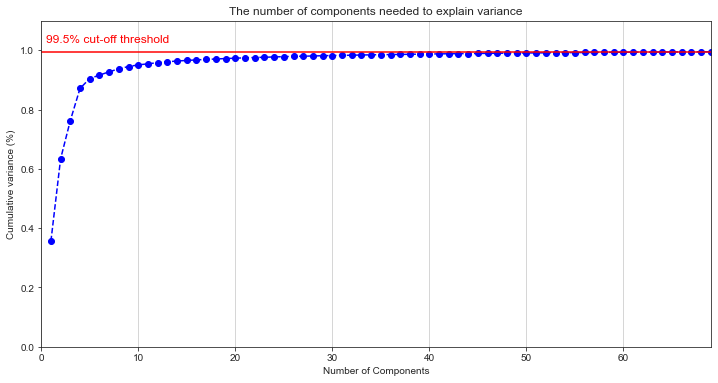

In [36]:
# Plot the variance with plt to make it easier to understand the meaning of the variance reached

pca = PCA().fit(data_rescaled)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 162, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.xlim(0.0,69)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.995, color='r', linestyle='-')
plt.text(0.5, 1.025, '99.5% cut-off threshold', color = 'red', fontsize=12)

ax.grid(axis='x')
plt.show()

## CONCLUSION OF THE RESULTS ##

From this model, it was possible to notice that the number of features at the end was relatively high for reaching a value of 99,5% cumulative variance. It is usual to have very satisfying results by 95% of the variance in situations like this. In this one, for example, it is notorious that from the 10th component the variation along the variance values was no longer that significant, the number of features would have dropped drastically from 69 to an average of 10 of 95% of variance had been requested. A smaller quantity is easier to deal with and work with, and it is still a meaningful value for the credibility of the model.

# CURSE OF DIMENSIONALITY

Over time, the mass of data to be analysed has increased, whether historical or in real-time. This growth is not only related to the number of records, but also to the number of attributes (columns or dimensions) that makes up the dataset. Imagining a dataset with 1,000 attributes per 200,000 records, it is humanly impossible to analyse all this information and for an algorithm, it is also too much work. The curse of dimensionality says that the amount of data needed to achieve the desired knowledge exponentially impact the number of necessary attributes. The performance of the classifier tends to degrade from a certain number of attributes, even if they are useful. In this way, it must be understood the term Curse of Dimensionality refers to various phenomena that arise in the analysis of data with many dimensions, often with hundreds or thousands of dimensions. Remembering that, basically, adding features does not mean that it always improves the performance of a classifier. In other words, it is possible to shortly say that the curse of dimensionality is the whole process facing the troubles between finding out the ideal number of features that would turn it into good conditions for handling the dataset to apply the preparation, cleaning and the next steps.

# REFERENCE LIST

Chun-Houh Chen, Wolfgang Karl Härdle, Unwin, A. and Springerlink (Online Service (2008). Handbook of Data Visualization. Berlin, Heidelberg: Springer Berlin Heidelberg.





Libguides.com. (2012). LibGuides: Harvard referencing quick guide: Citing and referencing material. [online] Available at: https://dkit.ie.libguides.com/harvard/citing-referencing.





matplotlib.org. (n.d.). Boxplot Demo — Matplotlib 3.1.2 documentation. [online] Available at: https://matplotlib.org/3.1.1/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py.





Müller, A.C. and Guido, S. (2017). Introduction to machine learning with Python : a guide for data scientists. Beijing: O’reilly.





Pandas (2018). Python Data Analysis Library — pandas: Python Data Analysis Library. [online] Pydata.org. Available at: https://pandas.pydata.org/.





Stack Overflow. (n.d.). python - Histogram Matplotlib. [online] Available at: https://stackoverflow.com/questions/5328556/histogram-matplotlib [Accessed 10 Nov. 2022].





Stack Overflow. (n.d.). python - Word count of Markdown cells in Jupyter Notebook. [online] Available at: https://stackoverflow.com/questions/71194571/word-count-of-markdown-cells-in-jupyter-notebook [Accessed 10 Nov. 2022].





Summerfield, M. (2010). Programming in Python 3 : a complete introduction to the Python language. Upper Saddle River, New Jersey: Addison-Wesley.